In [8]:
import matplotlib.pyplot as plt
from collections import Counter

## Timeset

In [9]:
from src.data import load_timeset

In [10]:
testset = load_timeset("test")
validset = load_timeset("valid")

### Test Labels Distribution

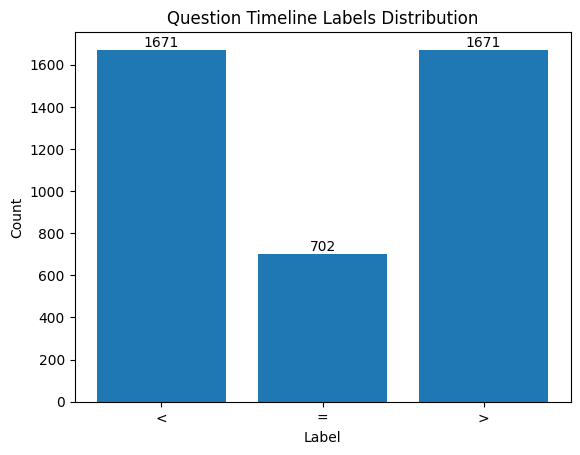

In [11]:
test_labels = testset["label"]
test_labels_counter = Counter(test_labels)

plt.bar(test_labels_counter.keys(), test_labels_counter.values())
for i, v in enumerate(test_labels_counter.values()):
    plt.text(i, v, str(v), ha="center", va="bottom")
plt.title("Question Timeline Labels Distribution")
plt.xlabel("Label")
plt.ylabel("Count")
plt.show()

### Valid Labels Distribution

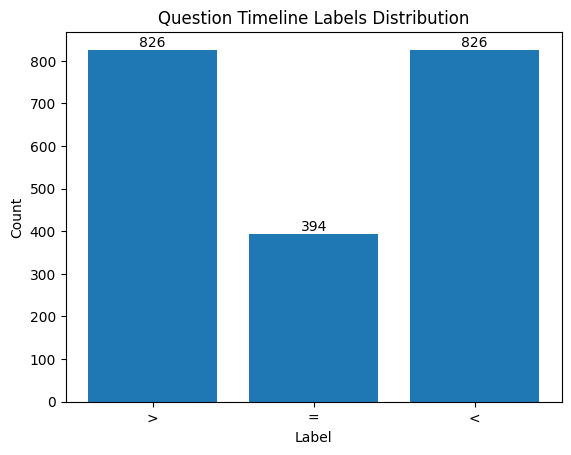

In [12]:
valid_labels = validset["label"]
valid_labels_counter = Counter(valid_labels)

plt.bar(
    valid_labels_counter.keys(), valid_labels_counter.values()
)  # add number to the bars
for i, v in enumerate(valid_labels_counter.values()):
    plt.text(i, v, str(v), ha="center", va="bottom")
plt.title("Question Timeline Labels Distribution")
plt.xlabel("Label")
plt.ylabel("Count")
plt.show()

### Example Questions

In [13]:
print("Question:\n", testset[0]["text"])
print("Answer:\n", testset[0]["label"])

Question:
 Twelve-year journey of Rosetta ends; spacecraft crashes into comet
Monday, October 3, 2016 
On Friday, European Space Agency's (ESA) spacecraft Rosetta ended its mission, <start_source>crashing</start_source> into Jupiter-family comet 67P/Churyumov–Gerasimenko. Rosetta is the first spacecraft to orbit a comet; it traveled in space for twelve years and about eight billion kilometres (about five billion miles).
The ESA's Darmstadt, Germany control centre <start_target>ceased</start_target> to receive signals from the spacecraft, confirming the Rosetta mission's end, at 11:19 UTC. Mission controllers said it was traveling about 90 centimeters per second on impact (two miles per hour), about a walking pace.
Almost two years ago, in November 2014, Rosetta successfully landed a probe called Philae onto 67P/Churyumov–Gerasimenko, with amongst its goals better understanding how the Solar System was formed. Philae's discoveries included the presence of molecular oxygen and nitrogen o

## Temporal Questions


In [15]:
from src.data import load_temporal_questions

In [17]:
trainset = load_temporal_questions("train", config="raw")
validset = load_temporal_questions("valid", config="raw")
testset = load_temporal_questions("test", config="raw")

### Test Labels Distribution

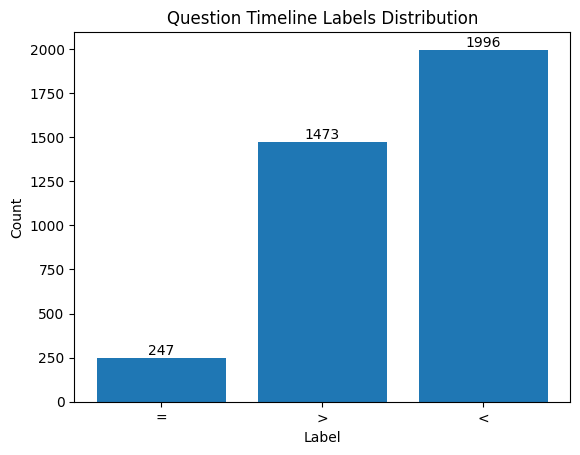

In [18]:
test_labels = testset["label"]
test_labels_counter = Counter(test_labels)

plt.bar(test_labels_counter.keys(), test_labels_counter.values())
for i, v in enumerate(test_labels_counter.values()):
    plt.text(i, v, str(v), ha="center", va="bottom")
plt.title("Question Timeline Labels Distribution")
plt.xlabel("Label")
plt.ylabel("Count")
plt.show()

### Valid Labels Distribution

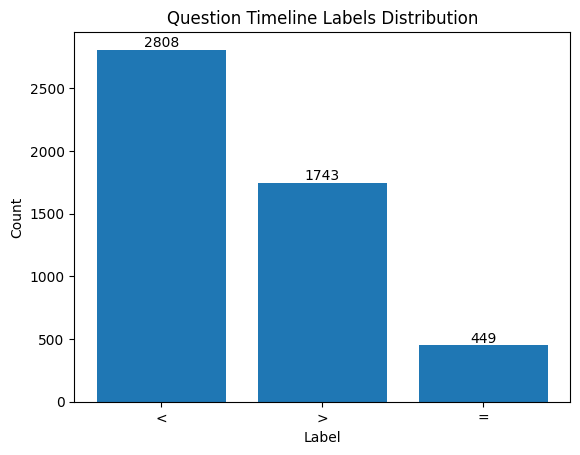

In [19]:
valid_labels = validset["label"]
valid_labels_counter = Counter(valid_labels)

plt.bar(
    valid_labels_counter.keys(), valid_labels_counter.values()
)  # add number to the bars
for i, v in enumerate(valid_labels_counter.values()):
    plt.text(i, v, str(v), ha="center", va="bottom")
plt.title("Question Timeline Labels Distribution")
plt.xlabel("Label")
plt.ylabel("Count")
plt.show()

### Train Labels Distribution

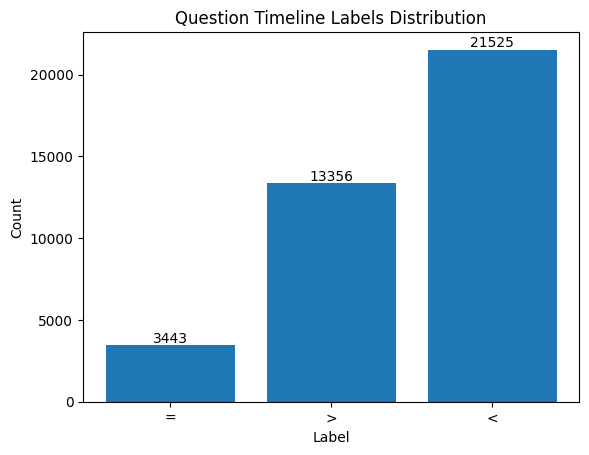

In [20]:
train_labels = trainset["label"]
train_labels_counter = Counter(train_labels)

plt.bar(
    train_labels_counter.keys(), train_labels_counter.values()
)  # add number to the bars
for i, v in enumerate(train_labels_counter.values()):
    plt.text(i, v, str(v), ha="center", va="bottom")
plt.title("Question Timeline Labels Distribution")
plt.xlabel("Label")
plt.ylabel("Count")
plt.show()

### Example

In [21]:
print("Text:\n", testset[0]["text"])
print("Label:\n", testset[0]["label"])

Text:
 "In light of the Israeli investigation into the incident, which pointed out several operational errors, Prime Minister Netanyahu apologized to the Turkish people for any errors that could have led to <start_source>loss</start_source> of life and agreed to complete the agreement on compensation," the statement said. Mr. Netanyahu told Mr. Erdogan that what happened on board the Mavi Marmara was "unintentional and Israel expresses regret over injuries and <start_target>loss</start_target> of life," according to the statement.
Label:
 =


In [22]:
testset[0]["text"]

'"In light of the Israeli investigation into the incident, which pointed out several operational errors, Prime Minister Netanyahu apologized to the Turkish people for any errors that could have led to <start_source>loss</start_source> of life and agreed to complete the agreement on compensation," the statement said. Mr. Netanyahu told Mr. Erdogan that what happened on board the Mavi Marmara was "unintentional and Israel expresses regret over injuries and <start_target>loss</start_target> of life," according to the statement.'

In [23]:
#### Check Contexts are Unique

In [24]:
print("Trainset length:", len(trainset["text"]))
print("Trainset unique length:", len(set(trainset["text"])))

print("Validset length:", len(validset["text"]))
print("Validset unique length:", len(set(validset["text"])))

print("Testset length:", len(testset["text"]))
print("Testset unique length:", len(set(testset["text"])))

Trainset length: 38324
Trainset unique length: 38324
Validset length: 5000
Validset unique length: 5000
Testset length: 3716
Testset unique length: 3712


Check the number of tokens.

In [25]:
from transformers import AutoTokenizer

In [26]:
tokenizer = AutoTokenizer.from_pretrained("HuggingFaceTB/SmolLM2-135M")

In [27]:
trainset = trainset.map(lambda x: {"n_tokens": len(tokenizer(x["text"]).input_ids)})
validset = validset.map(lambda x: {"n_tokens": len(tokenizer(x["text"]).input_ids)})
testset = testset.map(lambda x: {"n_tokens": len(tokenizer(x["text"]).input_ids)})

Map: 100%|██████████| 3716/3716 [00:00<00:00, 7216.26 examples/s]


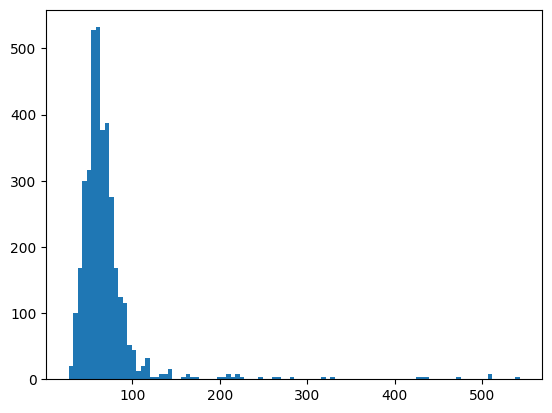

In [28]:
plt.hist(testset["n_tokens"], bins=100)
plt.show()

# Interval Benchmarks

### TempEval-3

In [29]:
import tieval.datasets

corpus = tieval.datasets.read("tempeval_3")

all_labels = [tl.relation.interval for doc in corpus.documents for tl in doc.tlinks]
unique_labels = list(set(all_labels))
test_docs = corpus.test

100%|██████████| 275/275 [00:00<00:00, 438.90it/s]


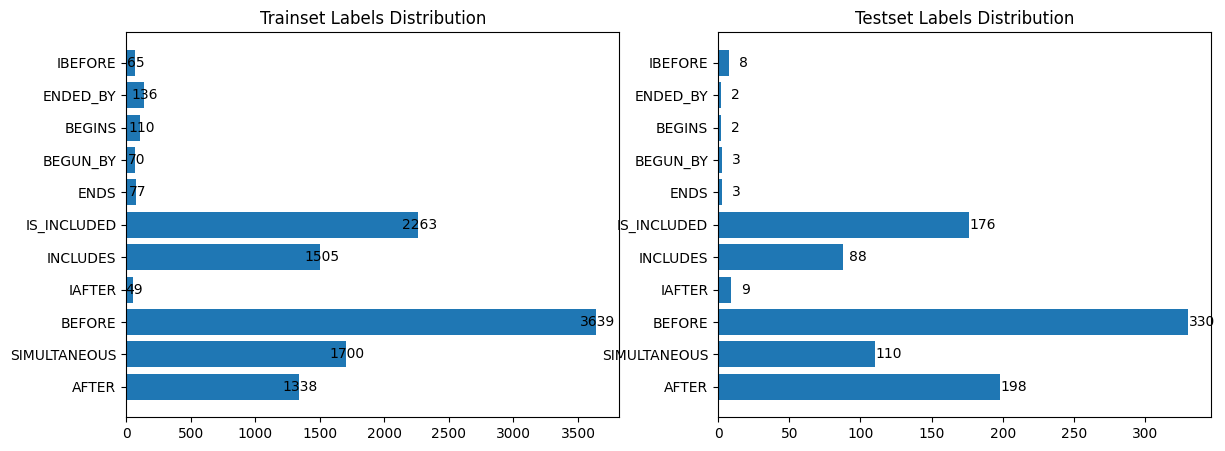

In [53]:
train_labels = [tl.relation.interval for doc in corpus.train for tl in doc.tlinks]
train_label_counter = Counter(train_labels)

test_labels = [tl.relation.interval for doc in test_docs for tl in doc.tlinks]
test_label_counter = Counter(test_labels)
# set the order of the test labels to be the same as the train labels
test_label_counter = {
    label: test_label_counter[label] for label in train_label_counter.keys()
}

fig, axs = plt.subplots(1, 2, figsize=(14, 5))
axs[0].barh(train_label_counter.keys(), train_label_counter.values())
axs[0].set_title("Trainset Labels Distribution")

# add the number to the bars
for i, v in enumerate(train_label_counter.values()):
    axs[0].text(v + 10, i, str(v), ha="center", va="center")

axs[1].barh(test_label_counter.keys(), test_label_counter.values())
axs[1].set_title("Testset Labels Distribution")
# add the number to the bars
for i, v in enumerate(test_label_counter.values()):
    axs[1].text(v + 10, i, str(v), ha="center", va="center")
plt.show()

In [54]:
unique_labels

['IAFTER',
 'INCLUDES',
 'BEGINS',
 'AFTER',
 'IS_INCLUDED',
 'IBEFORE',
 'BEFORE',
 'ENDED_BY',
 'SIMULTANEOUS',
 'ENDS',
 'BEGUN_BY']